# Random Forest for classification

---

Imported Libraries

In [50]:
# Data processing
# ==================================================================================
import pandas as pd
import numpy as np

# Charts
# ==================================================================================
import matplotlib.pyplot as plt

# Preprocessing and modeling
# ==================================================================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
from sklearn import tree



# Warnings Configuration
# ==================================================================================
import warnings

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn # ignore annoying warning (from sklearn and seaborn)

## Step 1: Decision making: Which is the best dataset



In [41]:
# Train data frames
X_train_with_outliers_sel = pd.read_csv('../data/processed/X_train_with_outliers_sel.csv')
X_train_without_outliers_sel = pd.read_csv('../data/processed/X_train_without_outliers_sel.csv')
X_train_with_outliers_norm_sel = pd.read_csv('../data/processed/X_train_with_outliers_norm_sel.csv')
X_train_without_outliers_norm_sel = pd.read_csv('../data/processed/X_train_without_outliers_norm_sel.csv')
X_train_with_outliers_minmax_sel = pd.read_csv('../data/processed/X_train_with_outliers_minmax_sel.csv')
X_train_without_outliers_minmax_sel = pd.read_csv('../data/processed/X_train_without_outliers_minmax_sel.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')

# Test data frames
X_test_with_outliers_sel = pd.read_csv('../data/processed/X_test_with_outliers_sel.csv')
X_test_without_outliers_sel = pd.read_csv('../data/processed/X_test_without_outliers_sel.csv')
X_test_with_outliers_norm_sel = pd.read_csv('../data/processed/X_test_with_outliers_norm_sel.csv')
X_test_without_outliers_norm_sel = pd.read_csv('../data/processed/X_test_without_outliers_norm_sel.csv')
X_test_with_outliers_minmax_sel = pd.read_csv('../data/processed/X_test_with_outliers_minmax_sel.csv')
X_test_without_outliers_minmax_sel = pd.read_csv('../data/processed/X_test_without_outliers_minmax_sel.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

In [42]:
# train_dicts (dict)
# =====================================================================================
train_dicts = {
  "X_train_with_outliers_sel": X_train_with_outliers_sel,
  "X_train_without_outliers_sel": X_train_without_outliers_sel,
  "X_train_with_outliers_norm_sel": X_train_with_outliers_norm_sel,
  "X_train_without_outliers_norm_sel": X_train_without_outliers_norm_sel,
  "X_train_with_outliers_minmax_sel": X_train_with_outliers_minmax_sel,
  "X_train_without_outliers_minmax_sel": X_train_without_outliers_minmax_sel
}

# test_dicts (dict)
# =====================================================================================
test_dicts = {
  "X_test_with_outliers_sel": X_test_with_outliers_sel,
  "X_test_without_outliers_sel": X_test_without_outliers_sel,
  "X_test_with_outliers_norm_sel": X_test_with_outliers_norm_sel,
  "X_test_without_outliers_norm_sel": X_test_without_outliers_norm_sel,
  "X_test_with_outliers_minmax_sel": X_test_with_outliers_minmax_sel,
  "X_test_without_outliers_minmax_sel": X_test_without_outliers_minmax_sel
}

# -.-.--.-.-.-.-.-.-.-.--.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.--.-.-.-.-.-.-

# train_dfs (list)
# =====================================================================================
train_dfs = [
  X_train_with_outliers_sel,
  X_train_without_outliers_sel,
  X_train_with_outliers_norm_sel,
  X_train_without_outliers_norm_sel,
  X_train_with_outliers_minmax_sel,
  X_train_without_outliers_minmax_sel
]

# test_dfs (list)
# =====================================================================================
test_dfs = [
  X_test_with_outliers_sel,
  X_test_without_outliers_sel,
  X_test_with_outliers_norm_sel,
  X_test_without_outliers_norm_sel,
  X_test_with_outliers_minmax_sel,
  X_test_without_outliers_minmax_sel
]

# -.-.--.-.-.-.-.-.-.-.--.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.--.-.-.-.-.-.-

# Print .shape
# =====================================================================================
print(f"X_train_with_outliers_sel shape: {X_train_with_outliers_sel.shape} ")
print(f"X_train_without_outliers_sel shape: {X_train_without_outliers_sel.shape} ")
print(f"X_train_with_outliers_norm_sel shape: {X_train_with_outliers_norm_sel.shape} ")
print(f"X_train_without_outliers_norm_sel shape: {X_train_without_outliers_norm_sel.shape} ")
print(f"X_train_with_outliers_minmax_sel shape: {X_train_with_outliers_minmax_sel.shape} ")
print(f"X_train_without_outliers_minmax_sel shape: {X_train_without_outliers_minmax_sel.shape}\n ")

print(f"X_test_with_outliers_sel shape: {X_test_with_outliers_sel.shape} ")
print(f"X_test_without_outliers_sel shape: {X_test_without_outliers_sel.shape} ")
print(f"X_test_with_outliers_norm_sel shape: {X_test_with_outliers_norm_sel.shape} ")
print(f"X_test_without_outliers_norm_sel shape: {X_test_without_outliers_norm_sel.shape} ")
print(f"X_test_with_outliers_minmax_sel shape: {X_test_with_outliers_minmax_sel.shape} ")
print(f"X_test_without_outliers_minmax_sel shape: {X_test_without_outliers_minmax_sel.shape}\n ")

X_train_with_outliers_sel shape: (614, 8) 
X_train_without_outliers_sel shape: (614, 8) 
X_train_with_outliers_norm_sel shape: (614, 8) 
X_train_without_outliers_norm_sel shape: (614, 8) 
X_train_with_outliers_minmax_sel shape: (614, 8) 
X_train_without_outliers_minmax_sel shape: (614, 8)
 
X_test_with_outliers_sel shape: (154, 8) 
X_test_without_outliers_sel shape: (154, 8) 
X_test_with_outliers_norm_sel shape: (154, 8) 
X_test_without_outliers_norm_sel shape: (154, 8) 
X_test_with_outliers_minmax_sel shape: (154, 8) 
X_test_without_outliers_minmax_sel shape: (154, 8)
 


In [43]:
results = []

for df_index in range(len(train_dfs)):
  model = RandomForestClassifier(random_state = 42) # Model initialization and training

  train_df = train_dfs[df_index]
  model.fit(train_df, y_train)

  '''y_train_pred = model.predict(train_df)'''
  y_test_pred = model.predict(test_dfs[df_index]) # Model prediction

  results.append(
    {
        "index": df_index,
        "train_df": list(train_dicts.keys())[df_index],
        "Accuracy_score": accuracy_score(y_test, y_test_pred)
  })

resultados = sorted(results, key = lambda x: x["Accuracy_score"], reverse = True)
resultados

c:\Users\Fermin\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Fermin\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Fermin\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Fermin\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[{'index': 0,
  'train_df': 'X_train_with_outliers_sel',
  'Accuracy_score': 0.7207792207792207},
 {'index': 2,
  'train_df': 'X_train_with_outliers_norm_sel',
  'Accuracy_score': 0.7207792207792207},
 {'index': 3,
  'train_df': 'X_train_without_outliers_norm_sel',
  'Accuracy_score': 0.7207792207792207},
 {'index': 4,
  'train_df': 'X_train_with_outliers_minmax_sel',
  'Accuracy_score': 0.7207792207792207},
 {'index': 1,
  'train_df': 'X_train_without_outliers_sel',
  'Accuracy_score': 0.7142857142857143},
 {'index': 5,
  'train_df': 'X_train_without_outliers_minmax_sel',
  'Accuracy_score': 0.7142857142857143}]

In [44]:
print (f"The best train dataframe is |{resultados[0]['train_df']}|.\n\
=======================================================      \n\
| Accuracy score: {resultados[0]['Accuracy_score']}   |\n\
========================================")

The best train dataframe is |X_train_with_outliers_sel|.
| Accuracy score: 0.7207792207792207   |


## Step 2: Model hyperparameters optimization

- ### 2.1 Grid SearchCV

In [45]:
model = RandomForestClassifier(random_state = 42)
model.fit(train_dfs[0], y_train)
y_pred = model.predict(test_dfs[0])

base_accuracy = accuracy_score(y_test, y_pred)
base_accuracy

c:\Users\Fermin\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.7207792207792207

In [46]:
from sklearn.model_selection import GridSearchCV

# We define the parameters that we want to adjust by hand
param_grid = {
    "n_estimators": [150],
    "criterion": ["gini", "entropy", "log_loss"],
    "min_weight_fraction_leaf": [0.01, 0.1, 0.2, 0.4, 0.8 ,1],
    "random_state": [42],
    "max_depth": [None, 3, 10, 20] 
}

# We initialize the grid
grid = GridSearchCV(model,
                     param_grid,
                       scoring = "accuracy",
                        verbose = 0,
                          cv = 6)
grid

GridSearchCV(cv=6, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 3, 10, 20],
                         'min_weight_fraction_leaf': [0.01, 0.1, 0.2, 0.4, 0.8,
                                                      1],
                         'n_estimators': [150], 'random_state': [42]},
             scoring='accuracy')

In [47]:
grid.fit(train_dfs[0], y_train)

print(f"Best hyperparameters: {grid.best_params_}")

c:\Users\Fermin\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Fermin\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Fermin\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Fermin\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_weight_fraction_leaf': 0.01, 'n_estimators': 150, 'random_state': 42}


In [48]:
model_grid = RandomForestClassifier(criterion = 'gini',
                                    max_depth = 10,
                                    min_weight_fraction_leaf = 0.01,
                                    random_state = 42,
                                    n_estimators = 150)
model_grid.fit(train_dfs[0], y_train)

y_pred = model_grid.predict(test_dfs[0])

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

c:\Users\Fermin\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.7532467532467533

In [49]:
print(f"We have an increment of {round(((grid_accuracy - base_accuracy)/base_accuracy)*100, 2)}%")

We have an increment of 4.5%


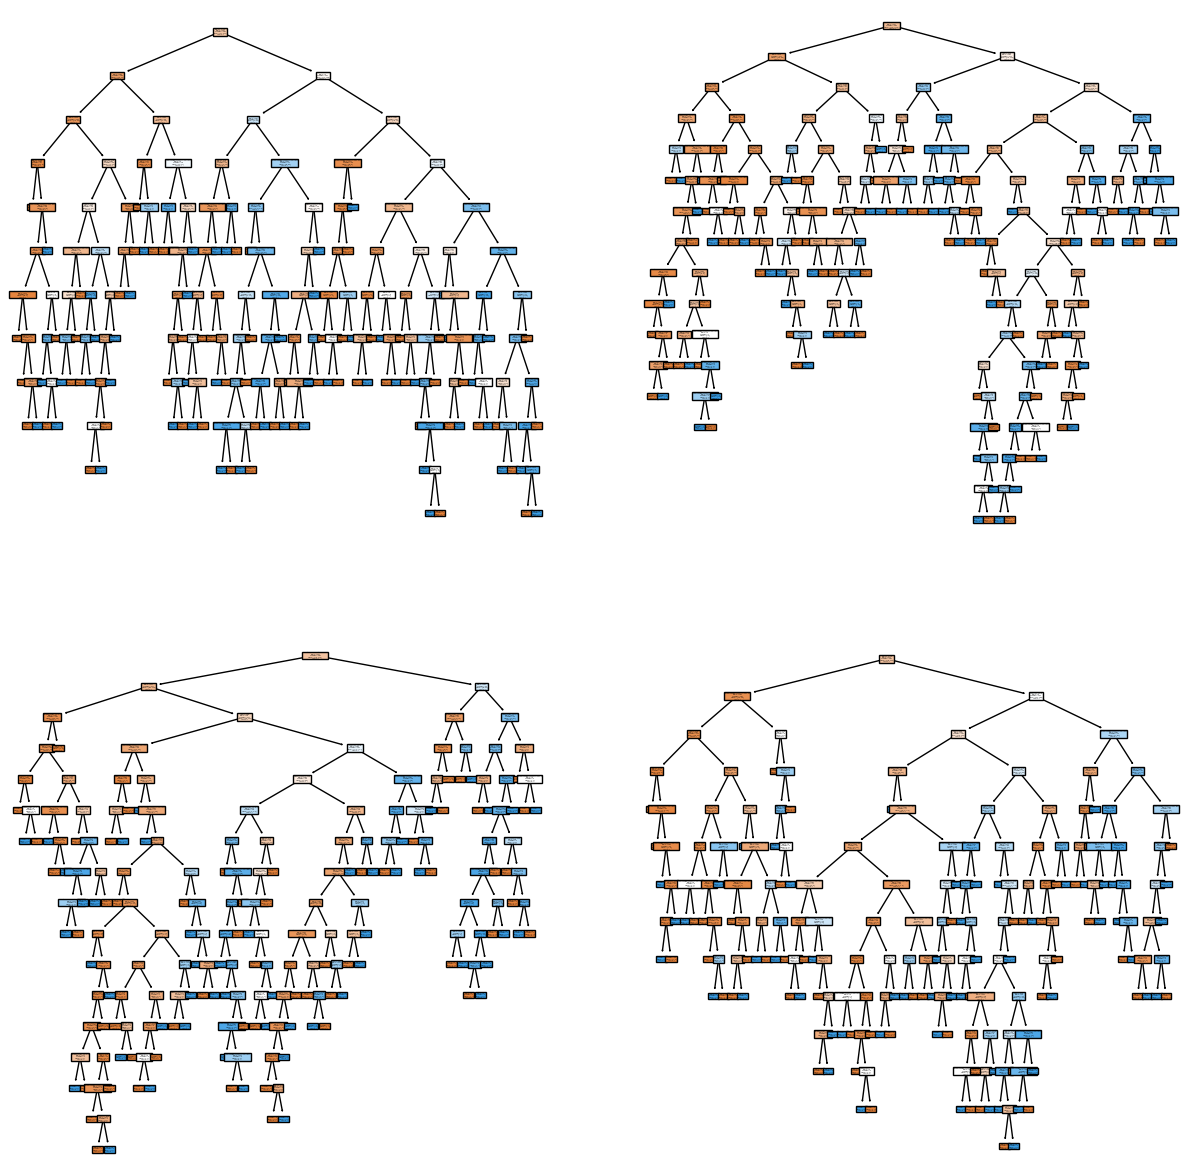

In [51]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(train_dfs[0].columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(train_dfs[0].columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(train_dfs[0].columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(train_dfs[0].columns), class_names = ["0", "1"], filled = True)

plt.show()